 # Introduction

L’analyse des données joue un rôle essentiel dans la prise de décision des entreprises.

Dans ce projet, nous analysons un dataset de **ventes** afin de :
- mieux comprendre le comportement des ventes,
- identifier les **produits et régions les plus performants**,
- extraire des informations utiles pour améliorer la **stratégie commerciale**.

Ce travail s’inscrit dans une démarche de **Data Analysis**, en utilisant **Python** et ses bibliothèques dédiées à la manipulation, l’analyse et la visualisation des données.
##  Objectif du projet

L’objectif principal de ce projet est d’analyser les données de ventes afin de :

- Identifier les régions générant le plus de chiffre d’affaires
- Analyser les performances des produits et des catégories
- Étudier l’évolution des ventes dans le temps
- Mettre en évidence des tendances et des comportements de consommation
- Fournir des recommandations basées sur les résultats obtenus

Cette analyse vise à aider à la prise de décisions stratégiques basées sur les données.

##  Description du Dataset

Le dataset utilisé dans ce projet contient des informations relatives aux ventes réalisées par une entreprise.
Il est composé de **200 observations** et de **8 variables**, décrivant les caractéristiques des ventes, des produits et des clients.

### Description des variables :

- **date** : Date à laquelle la vente a été effectuée
- **produit** : Nom du produit vendu
- **categorie** : Catégorie du produit
- **region** : Région géographique de la vente
- **client** : Identifiant ou nom du client
- **quantité** : Quantité de produits vendus
- **prix_unitaire** : Prix d’une unité du produit
- **prix_total** : Montant total de la vente


In [1]:
import pandas as pd

df = pd.read_csv(r"ventes_data.csv")
df.head()
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           200 non-null    object 
 1   produit        199 non-null    object 
 2   categorie      199 non-null    object 
 3   region         200 non-null    object 
 4   client         200 non-null    object 
 5   quantité       199 non-null    float64
 6   prix_unitaire  200 non-null    float64
 7   prix_total     200 non-null    float64
dtypes: float64(3), object(5)
memory usage: 12.6+ KB


,quantité,prix_unitaire,prix_total
count,199.000000,200.000000,200.000000
mean,10.251256,239.115250,2447.723950
std,5.644984,134.647624,2029.033223
min,1.000000,12.810000,42.810000
25%,5.000000,131.567500,788.855000
50%,10.000000,222.755000,1984.860000
75%,15.000000,339.512500,3417.425000
max,20.000000,499.300000,9517.800000



## DATA CLEANING


In [2]:
df['date'] = pd.to_datetime(df['date'])
df.isnull().sum()
df = df.dropna(subset=['produit', 'categorie'])
df['quantité'] = df['quantité'].fillna(df['quantité'].median())
(df['quantité'] * df['prix_unitaire'] == df['prix_total']).value_counts()


True     178
False     20
Name: count, dtype: int64

 ## EDA (ANALYSE EXPLORATOIRE)



### Ventes par région


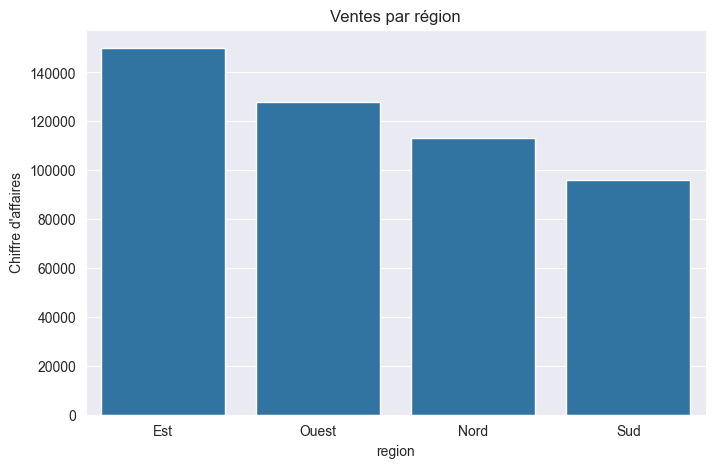

In [3]:
df['prix_total'].sum()
sales_region = df.groupby('region')['prix_total'].sum().sort_values(ascending=False)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x=sales_region.index, y=sales_region.values)
plt.title("Ventes par région")
plt.ylabel("Chiffre d'affaires")
plt.show()



### Ventes par catégorie

In [4]:
df.groupby('categorie')['prix_total'].sum().sort_values(ascending=False)


categorie
Alimentation    116350.22
Sports          110765.39
Maison           96695.58
Vêtements        92481.45
Électronique     71007.41
Name: prix_total, dtype: float64

### Top 10 produits


In [5]:
df.groupby('produit')['prix_total'].sum().sort_values(ascending=False).head(10)


produit
Chaise       92824.14
Téléphone    75071.79
Pain         60439.64
T-shirt      57866.16
TV           54604.56
PC           49255.76
Ballon       49083.31
Montre       48154.69
Name: prix_total, dtype: float64

### Évolution temporelle

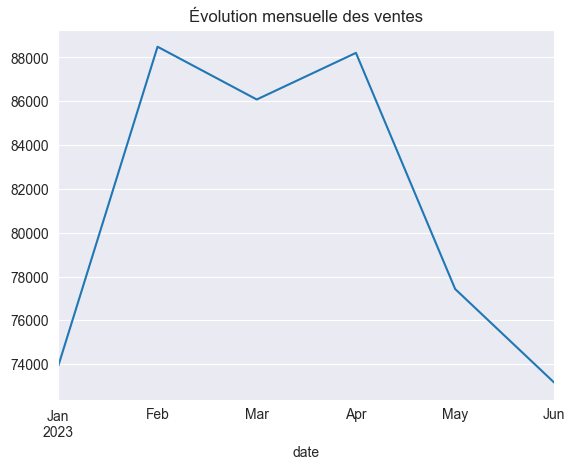

In [6]:
sales_time = df.groupby(df['date'].dt.to_period('M'))['prix_total'].sum()
sales_time.plot(kind='line', title="Évolution mensuelle des ventes")
plt.show()





##  Insights

- La région **Est** génère le chiffre d’affaires le plus élevé, ce qui suggère une forte concentration de clients actifs et un marché stratégique pour l’entreprise.
- La catégorie **Alimentation** domine les ventes, indiquant une forte demande et un potentiel de croissance pour cette catégorie.
- Les ventes connaissent des pics significatifs durant les mois de **janvier** et **avril**, suggérant une **saisonnalité** qui peut être exploitée pour des campagnes promotionnelles ciblées.
- Certains produits concentrent une part importante du chiffre d’affaires total, révélant les **produits phares** sur lesquels l’entreprise pourrait se focaliser, notamment : **Chaises**, **Téléphones**, **Pain**, et **T-shirt**.



 ##  Recommandations

- Renforcer les campagnes marketing dans les régions les plus performantes, notamment la région **Est**, afin de maximiser les revenus et exploiter le marché stratégique.
- Assurer une meilleure gestion des stocks pour les produits les plus vendus comme les **Chaises**, **Téléphones**, **Pain**, et **T-shirts**, afin d’éviter les ruptures et répondre à la demande.
- Lancer des promotions ciblées pendant les périodes de faible vente, par exemple le mois de **Mars**, pour stimuler la demande et lisser la saisonnalité.
- Exploiter les catégories dominantes comme **Alimentation** pour créer des offres promotionnelles attractives et fidéliser les clients.



##  Conclusion

Cette analyse a permis d’identifier les régions, catégories et produits les plus performants ainsi que les tendances temporelles des ventes.
Les résultats obtenus peuvent aider à améliorer la stratégie commerciale et la prise de décision.
